# WeatherPy
----

#### Conclusions:
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
### Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Make query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
total_cities = [city for city in cities]
total_cities_df = pd.DataFrame(total_cities, columns=["City"])
total_cities_df.head()

,City
0,sal rei
1,ancud
2,rikitea
3,hithadhoo
4,talnakh


In [19]:
# Make new column placeholders for the dataframe
total_cities_df["Latitude"] = ""
total_cities_df["Longitude"] = ""
total_cities_df["Temperature"] = ""
total_cities_df["Humidity"] = ""
total_cities_df["Cloudiness"] = ""
total_cities_df["Windspeed"] = ""

In [20]:
total_cities_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,sal rei,,,,,,
1,ancud,,,,,,
2,rikitea,,,,,,
3,hithadhoo,,,,,,
4,talnakh,,,,,,


In [43]:
# Iterate through rows of the dataframe
cities_iterated = 0

for index, row in total_cities_df.iterrows():
    specific_city = row["City"]
    query_url = f"{url}appid={api_key}&units={units}&q="
    print(f"Getting results for index {index}: {specific_city}.")
    
    try:
        response = requests.get(query_url + specific_city).json()
        
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        windspeed = response['wind']['speed']
        
        # Append to dataframe
        total_cities_df.at[index, "Latitude"] = lat
        total_cities_df.at[index, "Longitude"] = lon
        total_cities_df.at[index, "Temperature"] = temp
        total_cities_df.at[index, "Humidity"] = humidity
        total_cities_df.at[index, "Cloudiness"] = clouds
        total_cities_df.at[index, "Windspeed"] = windspeed

        cities_iterated +=1  
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    
    print("------------")
    
    # Prevent API key timeout from > 60 requests per minute
    if cities_iterated % 59 ==0:
        time.sleep(60)

Getting results for index 0: sal rei.
------------
Getting results for index 1: ancud.
------------
Getting results for index 2: rikitea.
------------
Getting results for index 3: hithadhoo.
------------
Getting results for index 4: talnakh.
------------
Getting results for index 5: cidreira.
------------
Getting results for index 6: port blair.
------------
Getting results for index 7: albany.
------------
Getting results for index 8: hobart.
------------
Getting results for index 9: luang prabang.
------------
Getting results for index 10: zhigansk.
------------
Getting results for index 11: saint-philippe.
------------
Getting results for index 12: carnarvon.
------------
Getting results for index 13: tiarei.
------------
Getting results for index 14: jamestown.
------------
Getting results for index 15: boa vista.
------------
Getting results for index 16: tuatapere.
------------
Getting results for index 17: vaini.
------------
Getting results for index 18: bredasdorp.
-----------

------------
Getting results for index 148: bahraich.
------------
Getting results for index 149: sisimiut.
------------
Getting results for index 150: tsihombe.
Missing field/result... skipping.
------------
Getting results for index 151: marrakesh.
------------
Getting results for index 152: alice springs.
------------
Getting results for index 153: la ermita.
------------
Getting results for index 154: constitucion.
------------
Getting results for index 155: kidal.
------------
Getting results for index 156: kasamwa.
------------
Getting results for index 157: micoud.
------------
Getting results for index 158: aksu.
------------
Getting results for index 159: vestmanna.
------------
Getting results for index 160: bintulu.
------------
Getting results for index 161: ayer itam.
Missing field/result... skipping.
------------
Getting results for index 162: san patricio.
------------
Getting results for index 163: namie.
------------
Getting results for index 164: mrirt.
Missing field/

------------
Getting results for index 292: arman.
------------
Getting results for index 293: snezhnogorsk.
------------
Getting results for index 294: lavrentiya.
------------
Getting results for index 295: nova olimpia.
------------
Getting results for index 296: bubaque.
------------
Getting results for index 297: portland.
------------
Getting results for index 298: skelleftea.
------------
Getting results for index 299: bilma.
------------
Getting results for index 300: te anau.
------------
Getting results for index 301: torbay.
------------
Getting results for index 302: vao.
------------
Getting results for index 303: simao.
------------
Getting results for index 304: soe.
------------
Getting results for index 305: rameswaram.
------------
Getting results for index 306: vaitape.
------------
Getting results for index 307: warrnambool.
------------
Getting results for index 308: mount gambier.
------------
Getting results for index 309: perth.
------------
Getting results for 

Missing field/result... skipping.
------------
Getting results for index 438: nampula.
------------
Getting results for index 439: pinsk.
------------
Getting results for index 440: guilin.
------------
Getting results for index 441: half moon bay.
------------
Getting results for index 442: yarada.
------------
Getting results for index 443: champerico.
------------
Getting results for index 444: gunjur.
------------
Getting results for index 445: suleja.
------------
Getting results for index 446: kununurra.
------------
Getting results for index 447: ulaanbaatar.
------------
Getting results for index 448: boralday.
------------
Getting results for index 449: zorritos.
------------
Getting results for index 450: iturama.
------------
Getting results for index 451: maraa.
------------
Getting results for index 452: astara.
------------
Getting results for index 453: caravelas.
------------
Getting results for index 454: bauchi.
------------
Getting results for index 455: chengde.
---

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Display dataframe
total_cities_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,sal rei,16.18,-22.92,21.00,68.0,20.0,7.20
1,ancud,-41.87,-73.82,15.00,58.0,0.0,5.10
2,rikitea,-23.12,-134.97,25.27,77.0,6.0,8.28
3,hithadhoo,-0.60,73.08,27.54,77.0,3.0,6.94
4,talnakh,69.49,88.40,-15.00,84.0,40.0,17.00


In [45]:
len(total_cities_df)

575

In [46]:
# Export the city data into a .csv
total_cities_df.to_csv("weatherpy_final_data.csv", encoding="utf-8", index=False)

In [47]:
# Convert the datatypes to numbers before plotting data

total_cities_df['Latitude'] = pd.to_numeric(total_cities_df['Latitude'], errors = 'coerce')
total_cities_df['Longitude'] = pd.to_numeric(total_cities_df['Longitude'], errors = 'coerce')
total_cities_df['Temperature'] = pd.to_numeric(total_cities_df['Temperature'], errors = 'coerce')
total_cities_df['Humidity'] = pd.to_numeric(total_cities_df['Humidity'], errors = 'coerce')
total_cities_df['Cloudiness'] = pd.to_numeric(total_cities_df['Cloudiness'], errors = 'coerce')
total_cities_df['Windspeed'] = pd.to_numeric(total_cities_df['Windspeed'], errors = 'coerce')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

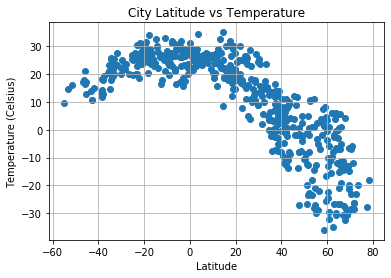

In [48]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Temperature"], marker = "o")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsTemperature.png")

plt.show()

#### Latitude vs. Humidity Plot

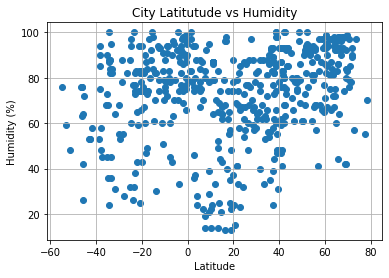

In [49]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Humidity"], marker = "o")
plt.title("City Latitutude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsHumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

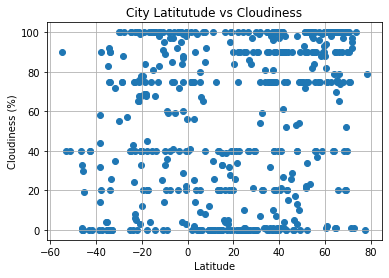

In [50]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Cloudiness"], marker = "o")
plt.title("City Latitutude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsCloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

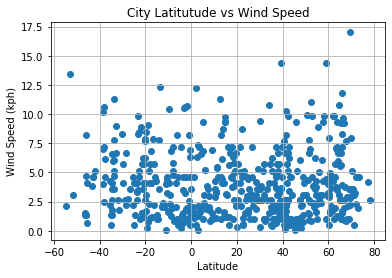

In [51]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Windspeed"], marker = "o")
plt.title("City Latitutude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsWindspeed.png")

plt.show()